In [1]:
import os 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/cellphone/Cellphone.csv")

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
X = data.drop('price_range',axis = 1)
y = data['price_range']


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 100)

In [6]:
svm = SVC()
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
score = svm.score(x_test, y_test)

In [8]:
print(score)

0.95


In [9]:
feature_names = ["feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state = 24)
forest.fit(x_train,y_train)

importances = forest.feature_importances_

In [ ]:
importances

In [11]:
x_labels = X.columns
feature_importances = pd.Series(importances, index = x_labels)

In [ ]:
feature_importances

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
feature_importances.plot.bar(ax = ax)


In [19]:
from sklearn.inspection import permutation_importance

#Fit random forest model - model agnostic! - anytime with any combination of features..
result = permutation_importance(forest, x_test,y_test, n_repeats = 10, random_state = 24, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index = x_labels)

<AxesSubplot:>

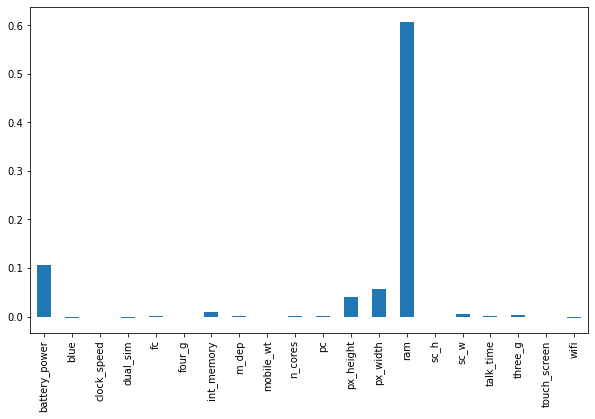

In [35]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
forest_importances.plot.bar(ax = ax)

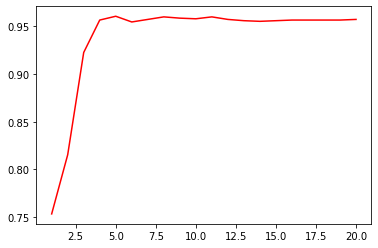

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif
train_accuracy = []
k = np.arange(1,21)

for i in k: 
    select = SelectKBest(f_classif, k = i)
    x_train_new = select.fit_transform(x_train,y_train)
    svm.fit(x_train_new, y_train)
    train_accuracy.append(svm.score(x_train_new, y_train))

plt.plot(k,train_accuracy,color = 'red',label = 'Train')

In [27]:
select = SelectKBest(f_classif, k = 5)
top_train = select.fit_transform(x_train,y_train)
#top_test = select.fit_transform(x_test,y_test)

In [31]:
x_train.columns.values[select.get_support()]

array(['battery_power', 'dual_sim', 'px_height', 'px_width', 'ram'],
      dtype=object)

In [32]:
x_test.columns.values[select.get_support()]

array(['battery_power', 'dual_sim', 'px_height', 'px_width', 'ram'],
      dtype=object)

In [34]:
C = [1.0,0.25,0.5,0.75]
kernels = ['rbf','linear']
gammas = ['auto',0.01,0.001,1]

svm = SVC()

#No need train and test split at all if you have cv here.. 
grid_svm = GridSearchCV(estimator = svm, param_grid=dict(kernel = kernels, C = C, gamma = gammas), cv = 5)
grid_svm.fit(top_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.25, 0.5, 0.75],
                         'gamma': ['auto', 0.01, 0.001, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#Evaluation 
#Confusion
#AUC - ROC